# 붓꽃(Iris) 데이터셋으로 붓꽃품종 클러스터링

## 분류/비지도학습 - K-Means clustering


붓꽃 데이터셋

 - 현대 통계학의 아버지, Roland Fisher 가 살아생전 수집한 150개의 붓꽃 데이터
 - 꽃받침 길이(Sepal length), 꽃받침 너비(Sepal width), 꽃잎 길이(Petal length), 꽃잎 너비(Petal width)에 의한 품종분류
 
 ![](https://cdn-images-1.medium.com/freeze/max/1000/1*gwmXliaxIBkY4NQBhoe9JQ.png)


 - 붓꽃 데이터셋
     - https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/iris_no_species.csv

### 붓꽃 데이터셋에서 "꽃잎의 길이"와 "너비"만을 가지고 품종 분류를 해보자 (비지도학습, 분류, K-means clustering)


In [2]:
## 필요한 라이브러리 import
import pandas as pd
from sklearn.cluster import KMeans #사이킷런에 구현되어 있는 KMeans 함수 import
import matplotlib.pyplot as plt

### 붓꽃 데이터를 읽어온 후, 데이터 전처리(꽃잎의 길이와 너비)

In [3]:
## Iris 데이터 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/iris_no_species.csv')

## 데이터 전처리: Petal length 와 Petal width 만 가지고 클러스터링 (그 외 데이터 삭제)
x_data = df.drop(['SepalLengthCm', 'SepalWidthCm'], axis=1)

x_data

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Scatter plot 으로 데이터 가시화 해보기

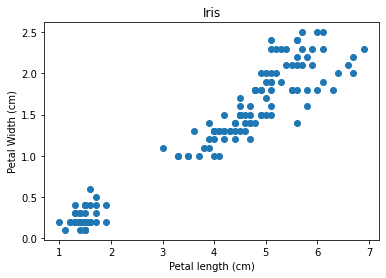

In [4]:
## Scatter plot 으로 데이터 가시화해보기(Visualize)
plt.scatter(x_data['PetalLengthCm'], x_data['PetalWidthCm'])
plt.title('Iris')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

### K-means 에 의한 클러스터링 수행

In [5]:
## 클러스터링 수행 by K-means clustering
model = KMeans(n_clusters=3) 
model.fit(x_data)

KMeans(n_clusters=3)

### K-means 클러스터링 결과 그림 그려보기

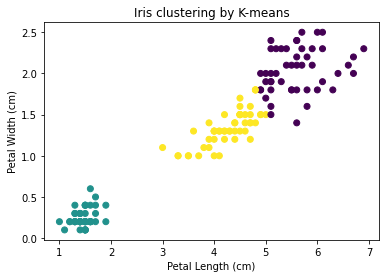

In [6]:
plt.scatter(x_data['PetalLengthCm'], x_data['PetalWidthCm'], c=model.labels_)
plt.title('Iris clustering by K-means')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

### 엘보법(Elbow method)을 이용한 k 개수 비교

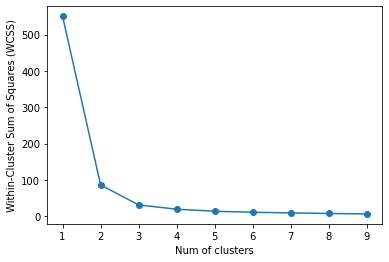

In [7]:
# 적절한 K 값을 구하기 위한 elbow method - WCSS 출력
inertias = []

for n_clusters in range(1, 10):
    model = KMeans(n_clusters=n_clusters)
    model.fit(x_data)
    inertias.append(model.inertia_)
    
plt.plot(range(1, 10), inertias, '-o')
plt.xlabel('Num of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()